In [2]:
# load tool

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

%matplotlib inline

C:\Users\Student\AppData\Local\Temp\ipykernel_52476\2215475066.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# import decision tree model
NN = MLPClassifier()
NN.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [3]:
# model evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

In [4]:
df_1 = pd.read_csv("apple_quality.csv")

In [5]:
df_1

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [6]:
df_1= df_1.replace(to_replace="good", value = 1)

In [7]:
df_1=df_1.replace(to_replace="bad", value = 0)

C:\Users\Student\AppData\Local\Temp\ipykernel_52476\3158947988.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1=df_1.replace(to_replace="bad", value = 0)


In [8]:
df_1=df_1.drop(4000)
df_1

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0.0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0


In [9]:
# split data into X and y
X_1 = df_1.drop("Quality",axis=1)
y_1= df_1["Quality"]

* split into training and testing

In [10]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X_1,y_1,test_size=0.2)

In [11]:
NN.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [12]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=1000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))
    

In [13]:
train_scores

[0.4984375,
 0.7309375,
 0.7184375,
 0.736875,
 0.7496875,
 0.7496875,
 0.65375,
 0.715,
 0.705,
 0.735625]

In [14]:
test_scores

[0.50125,
 0.74125,
 0.725,
 0.745,
 0.7575,
 0.7575,
 0.645,
 0.72375,
 0.71625,
 0.74375]

Max neural network score on the test data: 75.75%


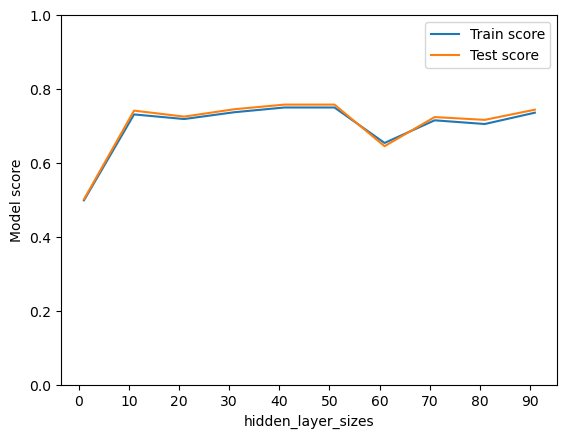

In [15]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")
# default parameters

In [16]:

f1_train_scores_relu=[]
f1_test_scores_relu=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=1000,activation='relu')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_relu.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_relu.append(f1_score(y1_test,y1_test_pred))
    
    

In [17]:

f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))


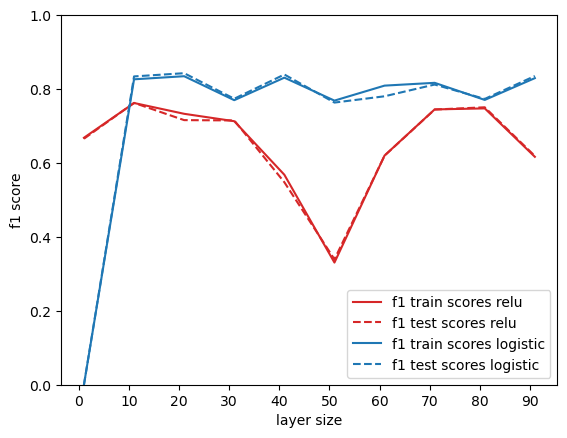

In [18]:
plt.plot(layer_size, f1_train_scores_relu, label="f1 train scores relu",color='C3',)
plt.plot(layer_size, f1_test_scores_relu, label="f1 test scores relu",color='C3', linestyle='--',)
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()



In [19]:
params_grid = {
    'activation': ['identity','logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': range(1,110,10),
    'solver':['lbfgs', 'sgd', 'adam'],
    'alpha':[0.0001,0.001],
    'max_iter':[5000],
}

In [20]:
grid_search = GridSearchCV(
    estimator=NN,
    param_grid=params_grid,
    return_train_score=True,
    cv=4,
    verbose=5,
)

In [21]:
grid_search.fit(X1_train,y1_train)

Fitting 4 folds for each of 264 candidates, totalling 1056 fits
[CV 1/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=lbfgs;, score=(train=0.499, test=0.499) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=lbfgs;, score=(train=0.740, test=0.759) total time=   0.0s
[CV 3/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=lbfgs;, score=(train=0.505, test=0.509) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=lbfgs;, score=(train=0.510, test=0.504) total time=   0.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.502) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=sgd;, score=(train=0.498, test=0.499) total time=   0.0s
[CV 3/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=sgd;, score=(train=0.498, test=0.499) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=sgd;, score=(train=0.499, test=0.499) total time=   0.0s
[CV 1/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=adam;, score=(train=0.748, test=0.733) total time=   0.7s
[CV 2/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=adam;, score=(train=0.505, test=0.472) total time=   0.6s
[CV 3/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=adam;, score

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.740, test=0.759) total time=   0.1s
[CV 3/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.737, test=0.748) total time=   0.3s
[CV 4/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.748, test=0.715) total time=   0.2s
[CV 1/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.499, test=0.497) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.498, test=0.499) total time=   0.0s
[CV 3/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.501) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=11, max_iter=5000, solver=s

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarn

[CV 3/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.501) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.501) total time=   0.0s
[CV 1/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=adam;, score=(train=0.740, test=0.726) total time=   0.2s
[CV 2/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=adam;, score=(train=0.691, test=0.716) total time=   0.2s
[CV 3/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=adam;, score=(train=0.738, test=0.748) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=adam;, score=(train=0.707, test=0.701) total time=   0.2s
[CV 1/4] END activation=identity, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, sc

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=identity, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.501) total time=   0.0s
[CV 1/4] END activation=identity, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=adam;, score=(train=0.703, test=0.693) total time=   0.1s
[CV 2/4] END activation=identity, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=adam;, score=(train=0.719, test=0.723) total time=   0.1s
[CV 3/4] END activation=identity, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=adam;, score=(train=0.720, test=0.730) total time=   0.1s
[CV 4/4] END activation=identity, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=adam;, score=(train=0.744, test=0.730) total time=   0.0s
[CV 1/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.501, test=0.501) total time=   0.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.740, test=0.757) total time=   0.5s
[CV 3/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.740, test=0.750) total time=   0.3s
[CV 4/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.749, test=0.724) total time=   0.3s
[CV 1/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.499, test=0.497) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.501) total time=   0.0s
[CV 3/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.498, test=0.499) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, sc

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.854, test=0.833) total time=  10.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.812, test=0.800) total time=  18.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.829, test=0.814) total time=  13.6s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.502) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.497) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.507) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.500) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=21, max_iter=5000, solver=ada

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.874, test=0.866) total time=  25.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.838, test=0.830) total time=  15.2s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.497, test=0.495) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.501) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.498, test=0.499) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.504, test=0.487) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=adam;, score=(train=0.731, test=0.695) total time=   0.2s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=adam

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.860, test=0.826) total time=  28.8s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.742, test=0.762) total time=   2.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.840, test=0.839) total time=  22.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.845, test=0.830) total time=  18.9s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.502) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.502) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.505, test=0.499) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.513, test=0.507) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=adam;, score=(train=0.824, test=0.821) total time=   1.5s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=adam

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.843, test=0.810) total time=  30.1s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.805, test=0.782) total time=  29.8s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.744, test=0.755) total time=   2.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.844, test=0.824) total time=  22.8s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.500) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.496) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.497, test=0.511) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.501) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=adam;, score=(train=0.774, test=0.759) total time=   0.8s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=adam

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.875, test=0.844) total time=  28.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.840, test=0.814) total time=  43.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.837, test=0.833) total time=  43.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.847, test=0.825) total time=  27.7s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.504, test=0.516) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.504, test=0.511) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.494, test=0.505) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.505) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, score=(train=0.749, test=0.733) total time=   0.5s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=adam

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.852, test=0.819) total time=  34.4s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.855, test=0.843) total time=  34.7s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.881, test=0.877) total time=  48.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.843, test=0.820) total time=  39.1s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.505, test=0.507) total time=   0.1s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.519, test=0.520) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.533, test=0.520) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.502) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=adam;, score=(train=0.778, test=0.729) total time=   0.9s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=adam

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.842, test=0.806) total time=  53.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.852, test=0.849) total time=  38.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.860, test=0.853) total time=  38.4s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.849, test=0.820) total time=  59.2s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.497, test=0.501) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.506) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.513, test=0.504) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.501) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, score=(train=0.828, test=0.816) total time=   1.8s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=adam

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.862, test=0.815) total time=  45.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.839, test=0.809) total time=  48.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.827, test=0.825) total time=  43.4s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.850, test=0.838) total time=  49.2s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.505) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.502) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.499, test=0.499) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.505) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=adam;, score=(train=0.833, test=0.800) total time=   1.9s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=adam

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.867, test=0.807) total time=  54.7s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.850, test=0.805) total time=  45.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.858, test=0.853) total time=  54.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.828, test=0.814) total time=  49.6s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.502) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.505, test=0.505) total time=   0.1s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.507, test=0.501) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.506) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=adam;, score=(train=0.748, test=0.724) total time=   0.6s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solv

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.823, test=0.804) total time=   7.4s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.820, test=0.823) total time=   4.7s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.828, test=0.824) total time=   7.5s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.498, test=0.496) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.501) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.502) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, sc

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.874, test=0.845) total time=  11.9s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.772, test=0.796) total time=   6.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.852, test=0.845) total time=  15.9s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.502) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.492) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.496, test=0.509) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.501) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=adam;, score=(train=0.771, test=0.771) total time=   0.5s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.850, test=0.835) total time=  17.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.840, test=0.829) total time=  25.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.853, test=0.864) total time=  23.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.848, test=0.843) total time=  22.9s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.501) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.505) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.512) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.507, test=0.499) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=adam;, score=(train=0.763, test=0.743) total time=   0.7s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.865, test=0.848) total time=  28.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.869, test=0.851) total time=  18.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.848, test=0.834) total time=  23.3s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.822, test=0.797) total time=  18.1s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.505, test=0.502) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.501) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.499, test=0.502) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.496) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=adam;, sco

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.824, test=0.804) total time=  38.5s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.825, test=0.791) total time=  33.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.843, test=0.840) total time=  38.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.855, test=0.859) total time=  46.8s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.506) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.501) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.507, test=0.507) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.499) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, score=(train=0.743, test=0.711) total time=   0.4s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.837, test=0.835) total time=  45.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.855, test=0.834) total time=  36.7s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.875, test=0.864) total time=  40.6s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.754, test=0.734) total time=   3.9s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.496, test=0.494) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.507, test=0.515) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.490, test=0.504) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.511, test=0.500) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=adam;, sco

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.832, test=0.806) total time=  39.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.858, test=0.849) total time=  35.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.867, test=0.840) total time=  51.7s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.851, test=0.829) total time=  56.6s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.504, test=0.502) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.499, test=0.504) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.499) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.500) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, score=(train=0.767, test=0.764) total time=   0.9s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.847, test=0.833) total time=  42.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.857, test=0.826) total time=  42.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.853, test=0.863) total time=  56.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.830, test=0.820) total time= 1.2min
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.501) total time=   0.1s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.502) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.507, test=0.504) total time=   0.1s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.496, test=0.491) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=adam;, score=(train=0.741, test=0.721) total time=   0.5s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.843, test=0.825) total time=  58.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.813, test=0.804) total time=  51.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.827, test=0.836) total time=  55.4s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.847, test=0.846) total time= 1.1min
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.511) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.506, test=0.502) total time=   0.1s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.494) total time=   0.1s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.502) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=adam;, score=(train=0.766, test=0.749) total time=   1.1s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=adam

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.872, test=0.861) total time=  26.3s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.755, test=0.735) total time=   2.6s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.502) total time=   0.1s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.500) total time=   0.1s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.500) total time=   0.0s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.500) total time=   0.0s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=adam;, score=(train=0.753, test

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.806, test=0.786) total time=  36.4s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.806, test=0.777) total time=  35.3s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.872, test=0.866) total time=  31.8s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.828, test=0.816) total time=  29.6s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.497) total time=   0.1s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.497) total time=   0.0s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.507) total time=   0.1s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.502, tes

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.885, test=0.860) total time=  41.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.858, test=0.838) total time=  41.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.827, test=0.829) total time=  44.3s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.845, test=0.839) total time=  39.6s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.498, test=0.501) total time=   0.1s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.506) total time=   0.1s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.514) total time=   0.2s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.504, test=0.501) total time=   0.1s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=adam;, score=(train=0.742, test

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.856, test=0.840) total time=  58.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.855, test=0.844) total time=  59.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.840, test=0.809) total time=  59.1s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.501) total time=   0.1s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.498, test=0.496) total time=   0.1s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.494) total time=   0.1s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.492) total time=   0.1s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, score=(train=0.756, test=0.749) total time=   1.1s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, score=(train=0.769, test=

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.854, test=0.844) total time= 1.1min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.856, test=0.840) total time= 1.1min
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.494) total time=   0.1s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.506, test=0.507) total time=   0.1s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.504, test=0.499) total time=   0.2s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.497, test=0.499) total time=   0.2s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=adam;, score=(train=0.746, test=0.721) total time=   1.3s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=adam;, score=(train=0.743, test=

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.862, test=0.835) total time= 1.2min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.867, test=0.853) total time= 1.3min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.860, test=0.849) total time= 1.3min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.855, test=0.851) total time= 1.3min
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.496) total time=   0.1s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.504, test=0.496) total time=   0.1s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.501) total time=   0.2s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.499, test=0.501) total time=   0.1s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, score=(train=0.725, test=0.705) total time=   0.6s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, score=(train=0.748, test=

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.855, test=0.814) total time= 1.4min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.844, test=0.826) total time= 1.4min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.852, test=0.826) total time= 1.4min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.862, test=0.850) total time= 1.4min
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.502) total time=   0.4s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.497, test=0.500) total time=   0.4s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.507, test=0.506) total time=   0.3s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.496, test=0.506) total time=   0.2s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=adam;, score=(train=0.741, test=0.724) total time=   1.1s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=adam;, score=(train=0.762, test=

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.902, test=0.869) total time= 1.5min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.855, test=0.838) total time= 1.5min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.858, test=0.861) total time= 1.6min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.856, test=0.833) total time= 1.6min
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.495) total time=   0.3s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.502) total time=   0.2s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.502) total time=   0.2s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.497, test=0.501) total time=   0.6s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=adam;, score=(train=0.772, test=0.759) total time=   2.2s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=adam;, score=(train=0.734

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.818, test=0.807) total time=  19.8s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.814, test=0.790) total time=  12.8s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.497, test=0.497) total time=   0.0s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.502) total time=   0.0s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.499, test=0.502) total time=   0.0s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.501) total time=   0.0s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=adam;, score=(train=0.723, test=0.694)

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.877, test=0.865) total time=  26.3s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.749, test=0.752) total time=   3.8s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.833, test=0.816) total time=  23.4s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.501) total time=   0.1s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.499, test=0.500) total time=   0.0s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.502) total time=   0.0s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.506, test=0.492

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.884, test=0.868) total time=  41.4s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.875, test=0.859) total time=  42.2s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.841, test=0.839) total time=  33.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.834, test=0.829) total time=  42.9s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.505, test=0.506) total time=   0.1s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.502) total time=   0.1s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.499, test=0.491) total time=   0.1s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.504, test=0.491) total time=   0.1s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=adam;, score=(train=0.772, test=0.750) total time=   0.7s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=adam;, score=(train=0.733, test=0.728) 

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.840, test=0.828) total time=  58.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.853, test=0.831) total time=  57.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.864, test=0.846) total time= 1.0min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.851, test=0.846) total time=  58.5s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.499) total time=   0.1s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.494) total time=   0.1s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.498, test=0.504) total time=   0.1s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.498, test=0.502) total time=   0.2s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, score=(train=0.758, test=0.731) total time=   1.0s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, score=(train=0.744, test=0.749) 

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.865, test=0.805) total time= 1.1min
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.747, test=0.749) total time=  12.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.854, test=0.845) total time= 1.1min
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.791, test=0.777) total time=  20.5s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.504, test=0.515) total time=   0.1s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.495) total time=   0.2s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.505) total time=   0.3s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.505, test=0.501) total time=   0.2s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=adam;, score=(train=0.757, test=0.751)

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.842, test=0.836) total time= 1.3min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.879, test=0.844) total time= 1.2min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.862, test=0.855) total time= 1.3min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.856, test=0.845) total time= 1.2min
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.502) total time=   0.4s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.499) total time=   0.1s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.501, test=0.504) total time=   0.2s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.511) total time=   0.1s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, score=(train=0.743, test=0.754) total time=   1.8s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, score=(train=0.733, test=0.750) 

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.881, test=0.844) total time= 1.4min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.833, test=0.825) total time= 1.4min
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.831, test=0.839) total time= 1.0min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.841, test=0.809) total time= 1.5min
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.503, test=0.497) total time=   0.3s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.505, test=0.506) total time=   0.2s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.494) total time=   0.3s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.507, test=0.505) total time=   0.1s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=adam;, score=(train=0.701, test=0.679) total time=   0.9s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=adam;, score=(train=0.736, test=0.755) 

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.860, test=0.829) total time= 1.6min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.845, test=0.834) total time= 1.6min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.892, test=0.892) total time= 1.6min


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.881, test=0.861) total time= 1.6min
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.505) total time=   0.2s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.506, test=0.502) total time=   0.2s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.507, test=0.500) total time=   0.3s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=adam;, score=(train=0.750, test=0.749) total time=   1.7s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=adam;, score=(train=0.762, test=

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=relu, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.747, test=0.752) total time=   0.2s
[CV 4/4] END activation=relu, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.759, test=0.741) total time=   0.2s
[CV 1/4] END activation=relu, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.500) total time=   0.1s
[CV 2/4] END activation=relu, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.500, test=0.501) total time=   0.0s
[CV 3/4] END activation=relu, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.502, test=0.504) total time=   0.1s
[CV 4/4] END activation=relu, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.499, test=0.500) total time=   0.0s
[CV 1/4] END activation=relu, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=adam;, score=(train=0.733, test=0.720)

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=4,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=91, max_iter=2000),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': range(1, 110, 10),
                         'max_iter': [5000],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             return_train_score=True, verbose=5)

In [31]:
res = grid_search.cv_results_


In [32]:
res

{'mean_fit_time': array([3.82063985e-02, 3.81386876e-02, 8.10539365e-01, 2.34503984e-01,
        6.18968606e-02, 2.27121294e-01, 4.26437378e-01, 5.91836572e-02,
        1.81339502e-01, 6.22371256e-01, 5.25789261e-02, 1.69988513e-01,
        6.11941516e-01, 6.61829710e-02, 1.48172319e-01, 5.22558928e-01,
        6.86417222e-02, 2.07422495e-01, 9.52369392e-01, 7.14029670e-02,
        1.74502194e-01, 1.07588679e+00, 5.80637455e-02, 1.53011322e-01,
        1.52885091e+00, 6.41245246e-02, 1.22339666e-01, 1.50386161e+00,
        6.41506314e-02, 1.35604322e-01, 1.39668328e+00, 7.62841105e-02,
        1.48469865e-01, 3.29021811e-02, 5.01502156e-02, 6.39268219e-01,
        8.34055543e-02, 4.93279099e-02, 2.34677196e-01, 3.23097408e-01,
        4.55102921e-02, 1.72164559e-01, 3.33960116e-01, 4.81677651e-02,
        1.53690159e-01, 4.50394630e-01, 5.88775873e-02, 1.46052122e-01,
        3.87191534e-01, 6.14075065e-02, 1.46342993e-01, 1.39696443e+00,
        7.29018450e-02, 1.66296303e-01, 9.12469

In [33]:
grid_search.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': 101,
 'max_iter': 5000,
 'solver': 'lbfgs'}

In [34]:
grid_search.score(X1_test,y1_test)

0.86

In [35]:
grid_search.score(X1_train,y1_train)
model=grid_search.best_estimator_

In [36]:
from sklearn.model_selection import learning_curve, validation_curve

In [37]:
NN_best = MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes = 101, max_iter=50000, solver='lbfgs')

In [38]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator=NN_best,
        X=X1_train,
        y=y1_train,
        train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1 ],
        return_times = True 
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_time_mean = np.mean(fit_times, axis=1)
fit_time_std = np.std(fit_times, axis=1)
score_time_mean = np.mean(score_times, axis=1)
score_time_std = np.std(score_times, axis=1)

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_m

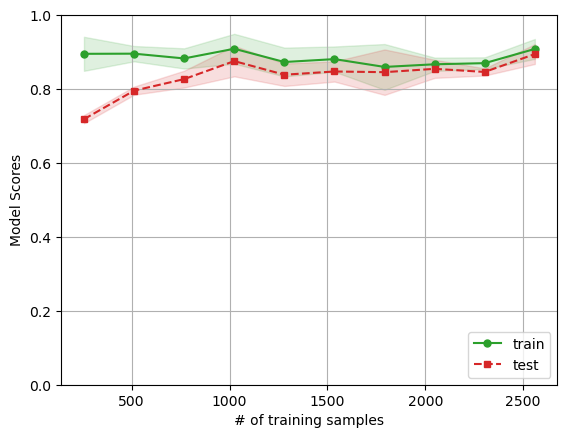

In [39]:
plt.plot(train_sizes, train_mean,
             color='C2', marker='o',
             markersize=5, label='train')

plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='C2')

plt.plot(train_sizes, test_mean,
             color='C3', linestyle='--',
             marker='s', markersize=5,
             label='test')

plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='C3')
plt.grid()
plt.ylim(0,1)
plt.xlabel('# of training samples')
plt.ylabel('Model Scores')
plt.legend(loc='lower right')
plt.show()

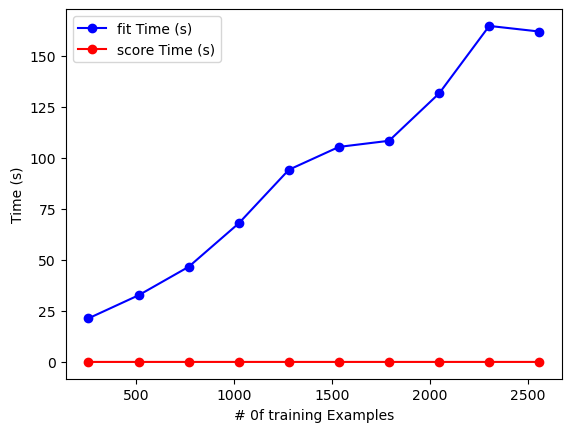

In [40]:
plt.figure()
# plt.title("Modeling Time: "+ title)
plt.xlabel("# 0f training Examples")
plt.ylabel("Time (s)")
plt.plot(train_sizes, fit_time_mean, 'o-', color="b", label="fit Time (s)")
plt.plot(train_sizes, score_time_mean, 'o-', color="r", label="score Time (s)")
plt.legend(loc="best")
plt.show()